In [1]:
%pylab --no-import-all notebook
from math import sqrt, factorial, isnan
import warnings
from sympy.utilities.iterables import multiset_permutations
from hmmlearn.hmm import GaussianHMM
import pandas as pd
import itertools as it
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"
valid_path = os.getcwd() + "/Validační tabulky/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
trlist = np.load(way + "seznam.npy").tolist()
trlist

['No104.npy',
 'No105.npy',
 'No106.npy',
 'No108.npy',
 'No110.npy',
 'No111.npy',
 'No116.npy',
 'No117.npy',
 'No118.npy',
 'No119.npy']

<IPython.core.display.Javascript object>


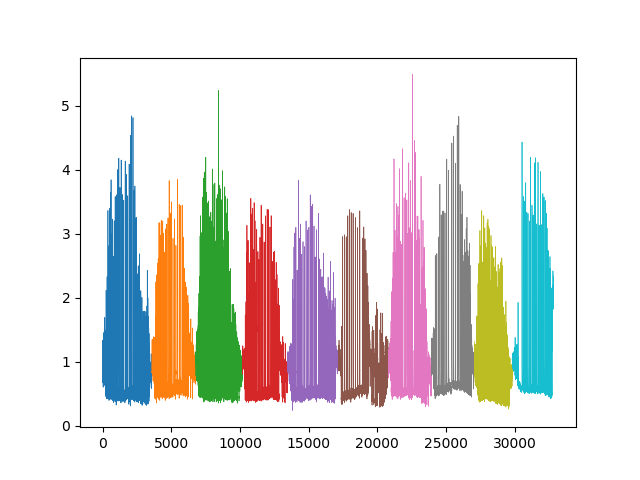

In [3]:
norma = [CL.normalization(np.load(way1 + d)[1] , delka_useku = 20, training_set = True) for d in trlist[:-1]]
norma.append(CL.normalization(np.load(way1 + "No11.npy")[1] , delka_useku = 20, training_set = True))
plt.figure("Vybraná reálná data po normalizaci")
posun = 0
for i in norma:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i)
plt.show()

In [7]:
train_data = []
test_data = []
for data in trlist[:-1]:
    train_data.append(np.load(way1 + data))

train_data.append(np.load(way1 + "No11.npy"))    
test_data.append(copy(train_data[-1]))

In [8]:
import sklearn.cluster as sk

In [9]:
km = sk.KMeans(3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
validace = CL.validuj(km, train_data, [train_data[-1]],\
                      delka_okna =[4,8,10,12], parametry  = [1,1,1,1,1], unsupervised = True)

In [7]:
"""
feat = CL.Set_Features(train_data[1], delky_oken = [4,8,10,12], prvni_derivace = False, druha_derivace = False,
                 suma_zleva = True, aritmeticky_prumer = True, rozptyl = True, vypis_rysy = False,
                 normalization = True, Training_set = True, vypis_nastavene_vlastnosti = False ):
"""

'\nfeat = CL.Set_Features(train_data[1], delky_oken = [4,8,10,12], prvni_derivace = False, druha_derivace = False,\n                 suma_zleva = True, aritmeticky_prumer = True, rozptyl = True, vypis_rysy = False,\n                 normalization = True, Training_set = True, vypis_nastavene_vlastnosti = False ):\n'

In [7]:
validace[0]

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(1, 1, 1, 1, 1)","[4, 8, 10, 12]",0.668252,1116,0.828136,0.621644,0.162075,0.537285,0.710092,0.491634,1.0,0.993251,0.845133,0.088183
1,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


# Moje verze

In [8]:
from K_Means import K_means

In [9]:
km = K_means(3)
km

In [10]:
val= CL.validuj(km, train_data, [train_data[-1]],\
                      delka_okna =[4,8,10,12], parametry  = [1,1,1,1,1], unsupervised = True)

In [11]:
val[0]

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(1, 1, 1, 1, 1)","[4, 8, 10, 12]",0.668252,1116,0.828136,0.621644,0.162075,0.537285,0.710092,0.491634,1.0,0.993251,0.845133,0.088183
1,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>


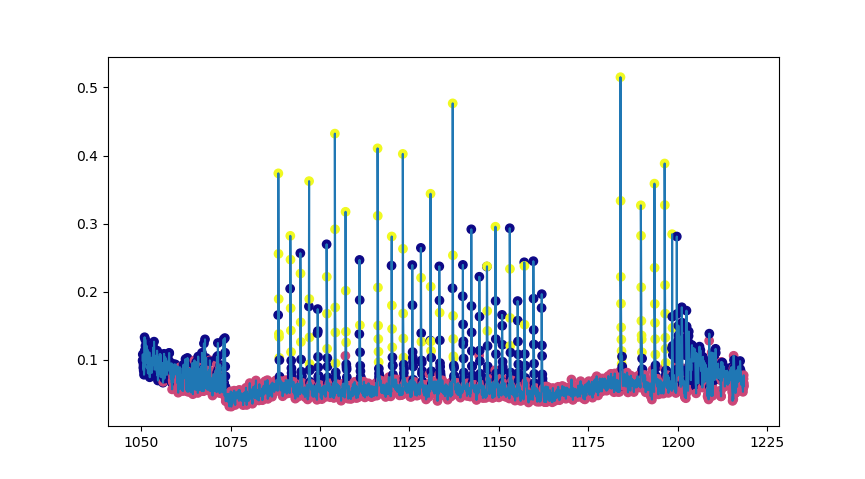

In [28]:
plt.figure("test")
plt.plot(train_data[-1][0],train_data[-1][1])
plt.scatter(train_data[-1][0],train_data[-1][1], c = val[1], cmap = plt.cm.plasma)
plt.show()

# Hromadné testy

In [10]:
len(train_data[:-1])

9

In [11]:
val1 = CL.validace_new(km, train_data[:-1], [train_data[-1]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], unsupervised = True)

[########################################################################] 100%


3056.07089304924


In [12]:
val1.to_csv(valid_path + 'Real_data_KM_1_Hm.csv',index=False)

In [14]:
tr2 = copy(train_data[:-2]) + copy(train_data[-1:])
len(tr2)

9

In [16]:
val2 = CL.validace_new(km, tr2, [train_data[-2]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], unsupervised = True)

[########################################################################] 100%


2750.349804878235


In [55]:
val2.to_csv(valid_path + 'Real_data_KM_2_Hm.csv',index=False)

In [18]:
tr3 = copy(train_data[:-3]) + copy(train_data[-2:])
len(tr3)

9

In [20]:
val3 = CL.validace_new(km, tr3, [train_data[-3]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], unsupervised = True)

[########################################################################] 100%


2988.7065641880035


In [25]:
val3.to_csv(valid_path + 'Real_data_KM_3_Hm.csv',index=False)

In [26]:
tr4 = copy(train_data[:-4]) + copy(train_data[-3:])
len(tr4)

9

In [27]:
val4 = CL.validace_new(km, tr4, [train_data[-4]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], unsupervised = True)

[########################################################################] 100%


2946.811266183853


In [28]:
val4.to_csv(valid_path + 'Real_data_KM_4_Hm.csv',index=False)

In [30]:
tr5 = copy(train_data[:-5]) + copy(train_data[-4:])
len(tr5)

9

In [31]:
val5 = CL.validace_new(km, tr5, [train_data[-5]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], unsupervised = True)

[########################################################################] 100%


3379.8119490146637


In [32]:
val5.to_csv(valid_path + 'Real_data_KM_5_Hm.csv',index=False)

In [33]:
tr6 = copy(train_data[:-6]) + copy(train_data[-5:])
len(tr6)

9

In [34]:
val6 = CL.validace_new(km, tr6, [train_data[-6]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], unsupervised = True)

[########################################################################] 100%


3339.6352229118347


In [35]:
val6.to_csv(valid_path + 'Real_data_KM_6_Hm.csv',index=False)

In [38]:
tr7 = copy(train_data[:-7]) + copy(train_data[-6:])
len(tr7)

9

In [39]:
val7 = CL.validace_new(km, tr7, [train_data[-7]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], unsupervised = True)

[########################################################################] 100%


3315.1675610542297


In [40]:
val7.to_csv(valid_path + 'Real_data_KM_7_Hm.csv',index=False)

In [41]:
tr8 = copy(train_data[:-8]) + copy(train_data[-7:])
len(tr8)

9

In [42]:
val8 = CL.validace_new(km, tr8, [train_data[-8]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], unsupervised = True)

[########################################################################] 100%


2972.551287174225


In [43]:
val8.to_csv(valid_path + 'Real_data_KM_8_Hm.csv',index=False)

In [46]:
tr9 = copy(train_data[:-9]) + copy(train_data[-8:])
len(tr9)

9

In [48]:
tr10 = copy(train_data[:-10]) + copy(train_data[-9:])
len(tr10)

9

In [49]:
val9 = CL.validace_new(km, tr9, [train_data[-9]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], unsupervised = True)

[########################################################################] 100%


3450.8671810626984


In [50]:
val9.to_csv(valid_path + 'Real_data_KM_9_Hm.csv',index=False)

In [51]:
val10 = CL.validace_new(km, tr10, [train_data[-10]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], unsupervised = True)

[########################################################################] 100%


4188.813926935196


In [52]:
val10.to_csv(valid_path + 'Real_data_KM_10_Hm.csv',index=False)

In [23]:
val2.head()

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)","(0, 0, 12, 6)",0.658695,1156,0.778942,0.715585,0.272468,0.588998,0.640742,0.633727,0.989637,0.993151,0.821727,0.157982
1,"(0, 0, 0, 1, 0)","(0, 0, 12, 6)",0.654266,1171,0.841888,0.648464,0.186047,0.558800,0.739378,0.498875,1.000000,0.977397,0.926184,0.102564
2,"(0, 0, 0, 1, 1)","(0, 0, 12, 6)",0.670505,1116,0.842946,0.665337,0.257925,0.588736,0.741801,0.518260,1.000000,0.976027,0.928969,0.148056
3,"(0, 0, 1, 0, 0)","(0, 0, 12, 6)",0.660171,1151,0.809417,0.685246,0.239826,0.578163,0.685009,0.563849,0.988024,0.989041,0.873259,0.136476
4,"(0, 0, 1, 0, 1)","(0, 0, 12, 6)",0.666076,1131,0.807380,0.692265,0.271429,0.590358,0.682097,0.576460,0.994764,0.989041,0.866295,0.157155


In [13]:
Sorted_KM1 = val1.sort_values(['Accuracy'], ascending=False)
Sorted_KM1.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3024,"(1, 0, 1, 1, 1)","(6, 10, 12, 12)",0.777667,667,0.930099,0.607642,0.409881,0.649207,0.878325,0.502311,0.697819,0.988359,0.768868,0.290155
856,"(0, 0, 1, 1, 1)","(6, 8, 12, 12)",0.777667,667,0.928962,0.611632,0.406966,0.649187,0.875429,0.507788,0.695925,0.989468,0.768868,0.287565
4090,"(1, 1, 1, 1, 1)","(6, 10, 12, 12)",0.777333,668,0.930342,0.606512,0.408425,0.648426,0.878758,0.500768,0.696875,0.988359,0.768868,0.288860
2988,"(1, 0, 1, 1, 1)","(6, 8, 12, 12)",0.777333,668,0.928962,0.611059,0.405505,0.648508,0.875429,0.506998,0.694969,0.989468,0.768868,0.286269
4054,"(1, 1, 1, 1, 1)","(6, 8, 12, 12)",0.777333,668,0.928962,0.611059,0.405505,0.648508,0.875429,0.506998,0.694969,0.989468,0.768868,0.286269
2029,"(0, 1, 1, 1, 1)","(0, 8, 12, 11)",0.777000,669,0.929614,0.611265,0.401480,0.647453,0.877461,0.502276,0.702265,0.988359,0.780660,0.281088
4161,"(1, 1, 1, 1, 1)","(0, 8, 12, 11)",0.777000,669,0.929614,0.611265,0.401480,0.647453,0.877461,0.502276,0.702265,0.988359,0.780660,0.281088
1922,"(0, 1, 1, 1, 1)","(6, 8, 12, 12)",0.777000,669,0.928962,0.610487,0.404040,0.647830,0.875429,0.506211,0.694006,0.989468,0.768868,0.284974
854,"(0, 0, 1, 1, 1)","(6, 8, 12, 10)",0.777000,669,0.928274,0.612782,0.402574,0.647877,0.873777,0.509375,0.693038,0.990022,0.768868,0.283679
3095,"(1, 0, 1, 1, 1)","(0, 8, 12, 11)",0.777000,669,0.929614,0.610546,0.402585,0.647582,0.877461,0.502283,0.700965,0.988359,0.778302,0.282383


In [22]:
Sorted_KM2 = val2.sort_values(['Accuracy'], ascending=False)
Sorted_KM2.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3015,"(1, 0, 1, 1, 1)","(6, 8, 16, 15)",0.563181,1203,0.699639,0.622827,0.240283,0.520916,0.539532,0.525510,0.977011,0.994867,0.764378,0.136986
1946,"(0, 1, 1, 1, 1)","(6, 8, 16, 12)",0.562818,1204,0.694624,0.629403,0.240793,0.521607,0.533590,0.535854,0.994152,0.994867,0.762523,0.136986
4077,"(1, 1, 1, 1, 1)","(6, 8, 16, 11)",0.562818,1204,0.693133,0.632308,0.240793,0.522078,0.531833,0.540079,0.994152,0.994867,0.762523,0.136986
4079,"(1, 1, 1, 1, 1)","(6, 8, 16, 13)",0.562818,1204,0.696621,0.625571,0.240793,0.520995,0.535951,0.530323,0.994152,0.994867,0.762523,0.136986
3012,"(1, 0, 1, 1, 1)","(6, 8, 16, 12)",0.562818,1204,0.695122,0.628440,0.240793,0.521452,0.534179,0.534460,0.994152,0.994867,0.762523,0.136986
3011,"(1, 0, 1, 1, 1)","(6, 8, 16, 11)",0.562818,1204,0.693381,0.631822,0.240793,0.521999,0.532125,0.539370,0.994152,0.994867,0.762523,0.136986
1950,"(0, 1, 1, 1, 1)","(6, 8, 16, 16)",0.562818,1204,0.699639,0.621785,0.240113,0.520512,0.539532,0.524904,0.971429,0.994867,0.762523,0.136986
1947,"(0, 1, 1, 1, 1)","(6, 8, 16, 13)",0.562818,1204,0.696371,0.626047,0.240793,0.521070,0.535655,0.531008,0.994152,0.994867,0.762523,0.136986
880,"(0, 0, 1, 1, 1)","(6, 8, 16, 12)",0.562455,1205,0.694624,0.628921,0.239546,0.521030,0.533590,0.535156,0.994118,0.994867,0.762523,0.136180
3013,"(1, 0, 1, 1, 1)","(6, 8, 16, 13)",0.562455,1205,0.696621,0.625095,0.239546,0.520421,0.535951,0.529639,0.994118,0.994867,0.762523,0.136180


In [54]:
Sorted_KM2 = val10.sort_values(['Accuracy'], ascending=False)
Sorted_KM2.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
1944,"(0, 1, 1, 1, 1)","(6, 8, 16, 10)",0.709399,1045,0.870818,0.596255,0.359305,0.608792,0.776627,0.440265,1.0,0.991010,0.923434,0.218995
4076,"(1, 1, 1, 1, 1)","(6, 8, 16, 10)",0.709399,1045,0.870818,0.596255,0.359305,0.608792,0.776627,0.440265,1.0,0.991010,0.923434,0.218995
878,"(0, 0, 1, 1, 1)","(6, 8, 16, 10)",0.709121,1046,0.870818,0.595808,0.358247,0.608291,0.776627,0.439779,1.0,0.991010,0.923434,0.218210
2998,"(1, 0, 1, 1, 1)","(6, 8, 14, 10)",0.708843,1047,0.869626,0.596255,0.360360,0.608747,0.775705,0.440265,1.0,0.989424,0.923434,0.219780
3010,"(1, 0, 1, 1, 1)","(6, 8, 16, 10)",0.708843,1047,0.870555,0.595363,0.358247,0.608055,0.776534,0.439294,1.0,0.990481,0.923434,0.218210
1922,"(0, 1, 1, 1, 1)","(6, 8, 12, 12)",0.708565,1048,0.866327,0.600152,0.361415,0.609298,0.769831,0.446712,1.0,0.990481,0.914153,0.220565
2999,"(1, 0, 1, 1, 1)","(6, 8, 14, 11)",0.708565,1048,0.869970,0.595522,0.359305,0.608266,0.776578,0.438944,1.0,0.988895,0.925754,0.218995
854,"(0, 0, 1, 1, 1)","(6, 8, 12, 10)",0.708565,1048,0.865789,0.601986,0.360360,0.609378,0.768663,0.448747,1.0,0.991010,0.914153,0.219780
855,"(0, 0, 1, 1, 1)","(6, 8, 12, 11)",0.708565,1048,0.866127,0.600610,0.361415,0.609384,0.769515,0.447219,1.0,0.990481,0.914153,0.220565
4075,"(1, 1, 1, 1, 1)","(6, 8, 16, 9)",0.708565,1048,0.870616,0.595363,0.356129,0.607369,0.776305,0.439294,1.0,0.991010,0.923434,0.216641
